#Import Library





In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset

In [ ]:
from sklearn import datasets

#memuat dataset iris
iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df ['target'] = iris ['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Keterangan:  
0 = Setosa
1 = Versicolour
2 = Virginica

In [ ]:
iris_df['spesies'] = iris_df['target'].map({0:'Setosa', 1:'Versicolor', 2: 'Virginica'})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,spesies
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


In [ ]:
iris_df['spesies'].value_counts()

spesies
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

#EDA

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


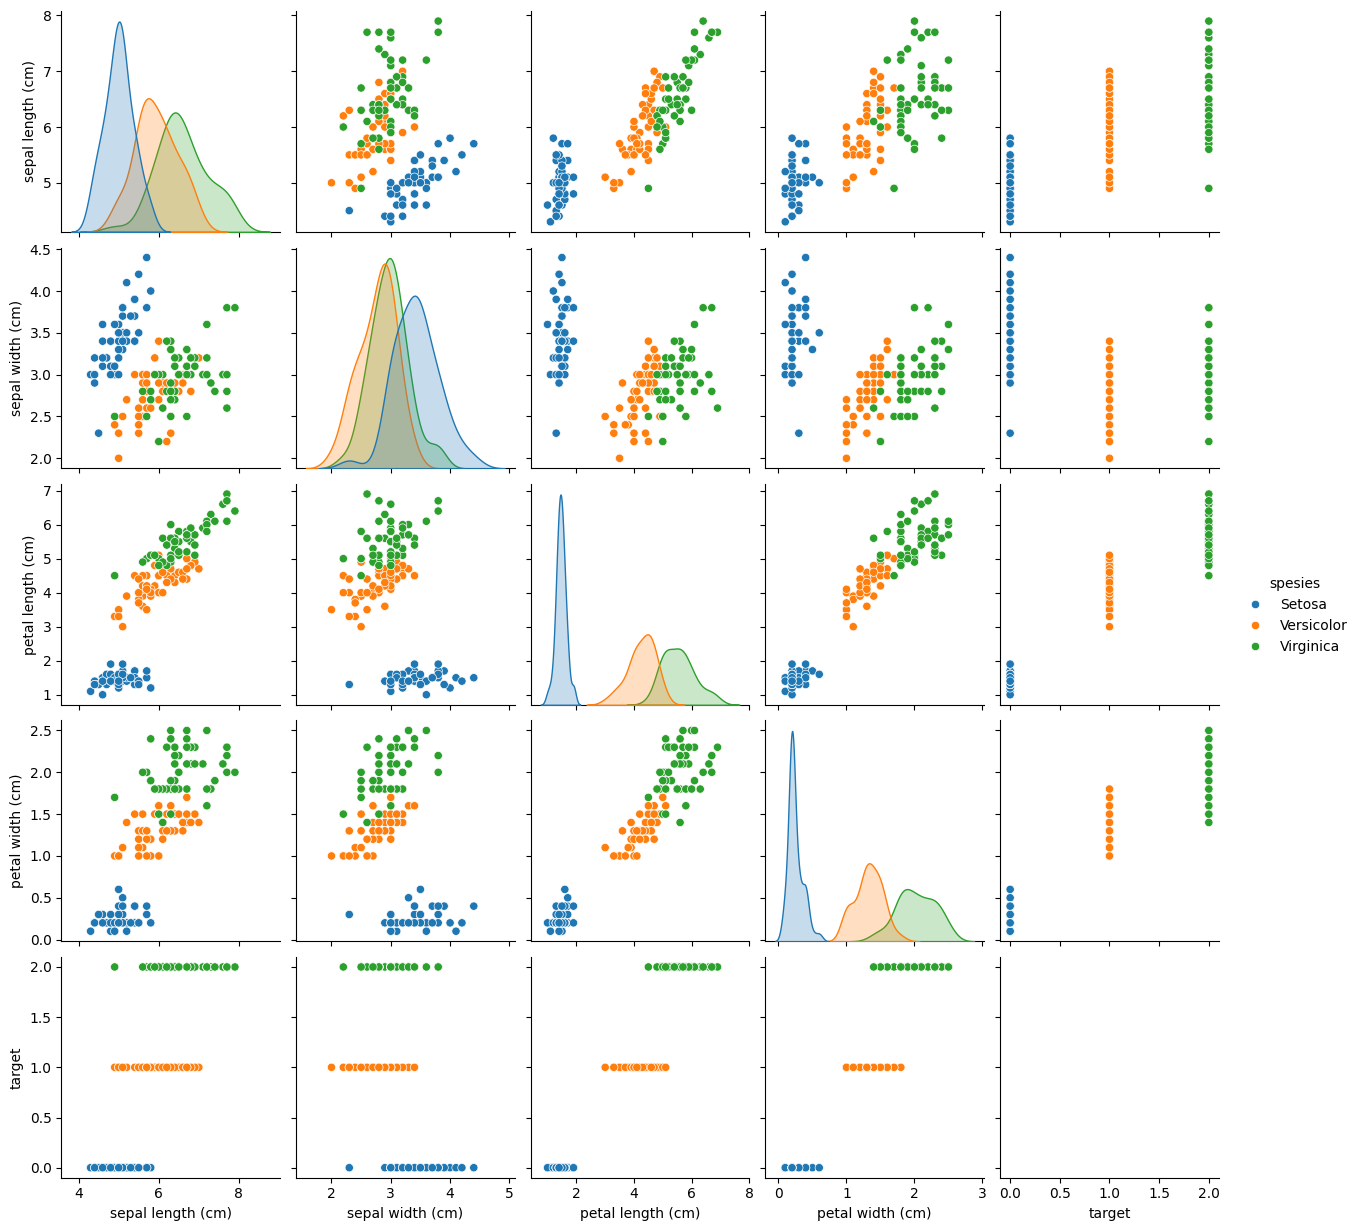

In [ ]:
sns.pairplot(iris_df,hue = 'spesies')

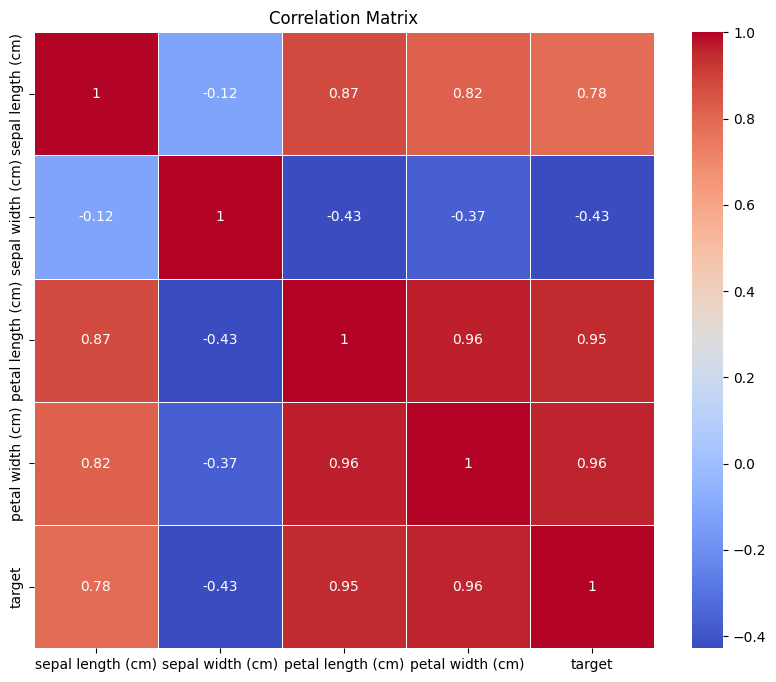

In [ ]:
correlation_matrix = iris_df.drop('spesies', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(iris_df, test_size = 0.25)

* Preparation Modeling


In [ ]:
x_train = df_train.drop(columns=['target', 'spesies']).values
y_train = df_train['target'].values

In [ ]:
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size = 0.25)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(xt, yt)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(xv)

In [ ]:
np.mean(y_pred == yv)

0.9285714285714286

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
akurasi = cross_val_score(knn, xt, yt, scoring = 'accuracy')
print(akurasi)

[1.         1.         0.94117647 1.         0.9375    ]


In [ ]:
np.mean(akurasi)

0.9757352941176471

#Misklasifikasi

In [ ]:
y_pred = cross_val_predict(knn, x_train, y_train, cv = 5)

In [ ]:
prediksitrue = y_pred == y_train

In [ ]:
prediksifalse = ~prediksitrue

In [ ]:
x_train[prediksifalse]

array([[6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.5, 4.9, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 2.2, 5. , 1.5]])

In [ ]:
df_prediksi = df_train.copy()

In [ ]:
df_prediksi['prediksi_benar'] = prediksitrue

In [ ]:
df_prediksi['prediksi'] = y_pred

In [ ]:
df_prediksi['prediksi_spesies'] = df_prediksi['prediksi'].map({0:'Setosa', 1:'Versicolor', 2: 'Virginica'})

In [ ]:
df_prediksi.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,spesies,prediksi_benar,prediksi,prediksi_spesies
46,5.1,3.8,1.6,0.2,0,Setosa,True,0,Setosa
108,6.7,2.5,5.8,1.8,2,Virginica,True,2,Virginica
77,6.7,3.0,5.0,1.7,1,Versicolor,False,2,Virginica
83,6.0,2.7,5.1,1.6,1,Versicolor,False,2,Virginica
27,5.2,3.5,1.5,0.2,0,Setosa,True,0,Setosa


#Scatter Plot

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

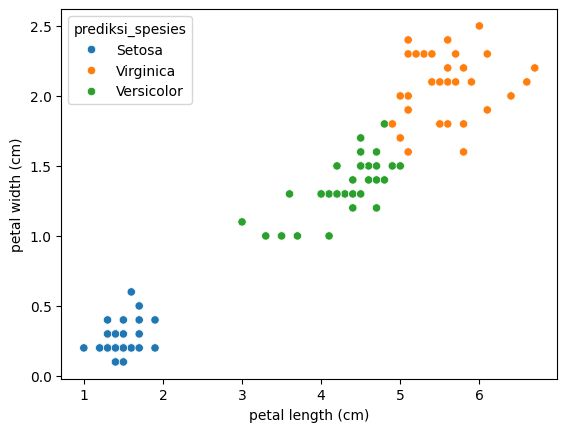

In [ ]:
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'prediksi_spesies', data = df_prediksi)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

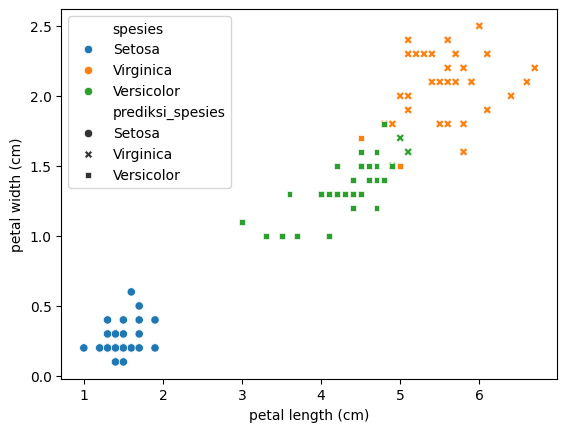

In [ ]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='spesies', style='prediksi_spesies', data=df_prediksi)

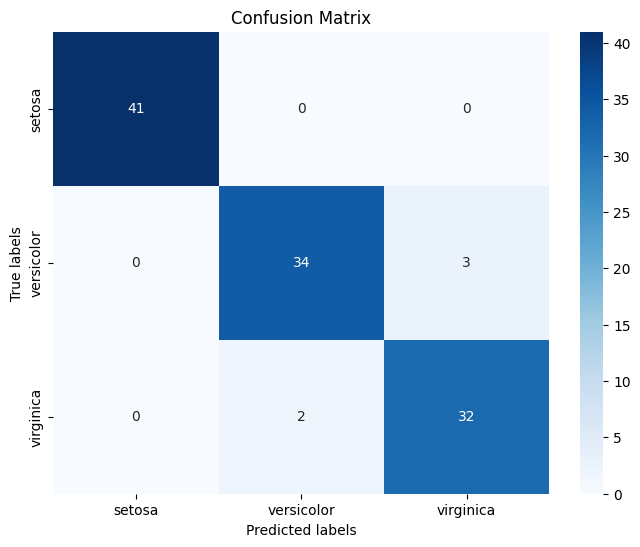

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Model Tuning

In [ ]:
for parameter in (1,2,3,4,5,6,7, 8, 9, 10):
  print(parameter)
  knn = KNeighborsClassifier(n_neighbors=parameter)
  akurasi = cross_val_score(knn, x_train, y_train, cv = 5, scoring = 'accuracy')
  print(f'Akurasi: {np.mean(akurasi) * 100:2f}%')

1
Akurasi: 95.533597%
2
Akurasi: 95.494071%
3
Akurasi: 95.573123%
4
Akurasi: 94.624506%
5
Akurasi: 94.664032%
6
Akurasi: 93.754941%
7
Akurasi: 94.664032%
8
Akurasi: 93.754941%
9
Akurasi: 93.754941%
10
Akurasi: 93.754941%


#Final Model

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

#Uji pada Dataset Test

In [ ]:
x_test = df_test.drop(columns=['target', 'spesies']).values
y_test = df_test['target'].values

In [ ]:
#Train Pada Final Model
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
klasifikasitrue = y_test_pred == y_test
test_set_akurasi = np.mean(klasifikasitrue)

In [ ]:
print(f'Test Set akurasi: {test_set_akurasi * 100:2f}')

Test Set akurasi: 97.368421


#Scatter Plot #2

In [ ]:
df_pred_test = df_test.copy()
df_pred_test ['prediksi_benar'] = klasifikasitrue
df_pred_test ['prediksi'] = y_test_pred
df_pred_test ['prediksi_spesies'] = df_pred_test['prediksi'].map({0:'Setosa', 1:'Versicolor', 2: 'Virginica'})
df_pred_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,spesies,prediksi_benar,prediksi,prediksi_spesies
88,5.6,3.0,4.1,1.3,1,Versicolor,True,1,Versicolor
26,5.0,3.4,1.6,0.4,0,Setosa,True,0,Setosa
134,6.1,2.6,5.6,1.4,2,Virginica,True,2,Virginica
125,7.2,3.2,6.0,1.8,2,Virginica,True,2,Virginica
107,7.3,2.9,6.3,1.8,2,Virginica,True,2,Virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

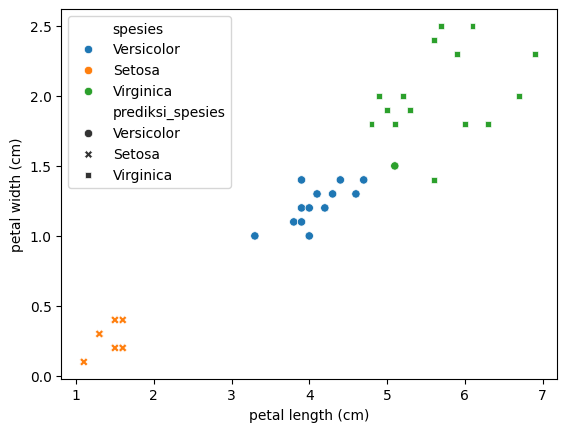

In [ ]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='spesies', style='prediksi_spesies', data=df_pred_test)

#Confusion Matrix #2

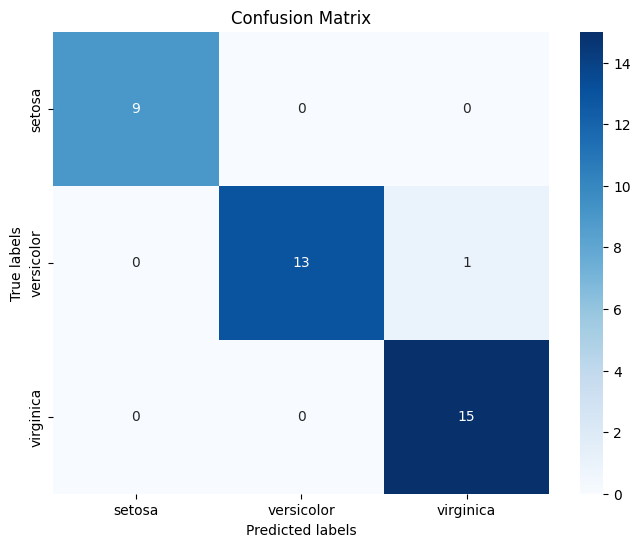

In [ ]:
cm = confusion_matrix(y_test_pred, y_test)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()